<a href="https://colab.research.google.com/github/QaziSaim/DeepLearning--DeepNeuralNetwork-/blob/main/PyTorch_ON_Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
data = load_iris()
X = data.data
y = data.target

In [3]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [4]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)



In [7]:
import torch
X_train = torch.FloatTensor(x_train)
X_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [8]:
import torch.nn as nn
import torch.optim as optim

In [37]:
class NeuralNetworkClassification(nn.Module):
  def __init__(self,input_shape,output_shape):
    super(NeuralNetworkClassification,self).__init__()
    self.input_layer = nn.Linear(input_shape,128)
    self.hidden_layer1 = nn.Linear(128,64)
    self.hidden_layer2 = nn.Linear(64, 32)
    self.output_layer = nn.Linear(32,output_shape)
    self.relu = nn.ReLU()

  def forward(self,x):
    x = self.relu(self.input_layer(x))
    x = self.relu(self.hidden_layer1(x))
    x = self.relu(self.hidden_layer2(x))
    x = self.relu(self.output_layer(x))
    return x

In [38]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(torch.Size([105, 4]),
 torch.Size([105]),
 torch.Size([45, 4]),
 torch.Size([45]))

In [39]:
input_dim=4
output_dim=3
model = NeuralNetworkClassification(input_shape=input_dim,output_shape=output_dim)

In [40]:
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate,weight_decay=1e-5)


In [41]:
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
  for epoch in range(num_epochs):
    optimizer.zero_grad()

    output_train = model(X_train)

    loss_train = criterion(output_train, y_train)

    loss_train.backward()

    optimizer.step()

    output_test= model(X_test)

    loss_test = criterion(output_test, y_test)

    train_losses[epoch] = loss_train.item()
    test_losses[epoch] = loss_test.item()
    if (epoch + 1) % 50 == 0:
      print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [42]:
import numpy as np

In [43]:
num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [44]:
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)


Epoch 50/1000, Train Loss: 0.7435, Test Loss: 0.7568
Epoch 100/1000, Train Loss: 0.7438, Test Loss: 0.7937
Epoch 150/1000, Train Loss: 0.7429, Test Loss: 0.7360
Epoch 200/1000, Train Loss: 0.7429, Test Loss: 0.7328
Epoch 250/1000, Train Loss: 0.7429, Test Loss: 0.7327
Epoch 300/1000, Train Loss: 0.7429, Test Loss: 0.7327
Epoch 350/1000, Train Loss: 0.7429, Test Loss: 0.7326
Epoch 400/1000, Train Loss: 0.7429, Test Loss: 0.7326
Epoch 450/1000, Train Loss: 0.7429, Test Loss: 0.7326
Epoch 500/1000, Train Loss: 0.7429, Test Loss: 0.7326
Epoch 550/1000, Train Loss: 0.7429, Test Loss: 0.7325
Epoch 600/1000, Train Loss: 0.7429, Test Loss: 0.7325
Epoch 650/1000, Train Loss: 0.7429, Test Loss: 0.7813
Epoch 700/1000, Train Loss: 0.7430, Test Loss: 0.7813
Epoch 750/1000, Train Loss: 0.7429, Test Loss: 0.7812
Epoch 800/1000, Train Loss: 0.7429, Test Loss: 0.7754
Epoch 850/1000, Train Loss: 0.7429, Test Loss: 0.7676
Epoch 900/1000, Train Loss: 0.7429, Test Loss: 0.7610
Epoch 950/1000, Train Loss: 0

In [45]:
import matplotlib.pyplot as plt

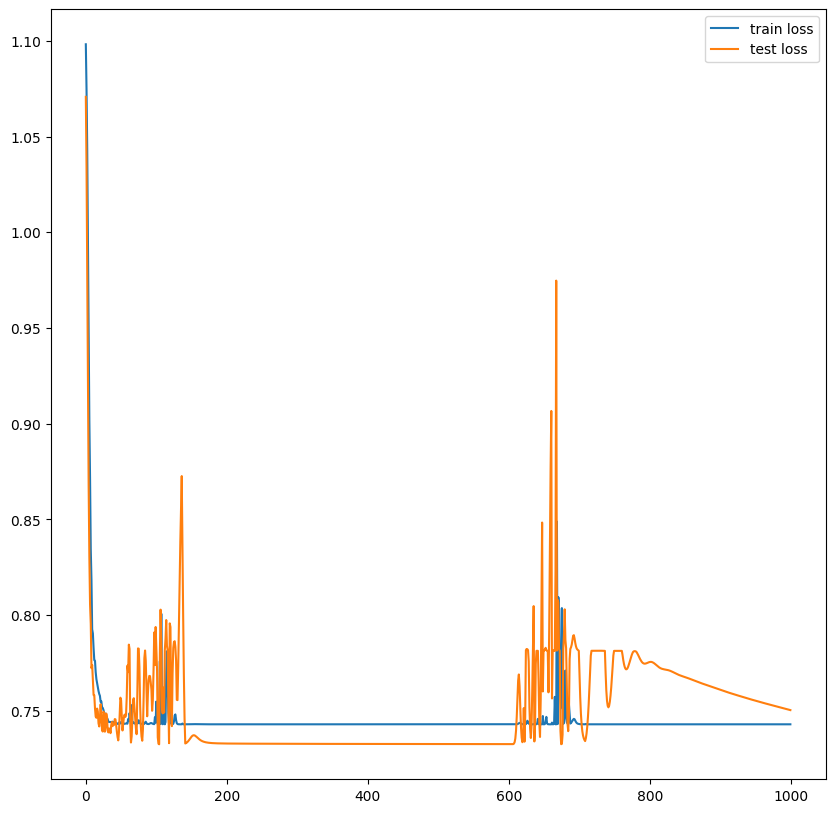

In [46]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()